## MNIST

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

### 데이터 불러오기

In [3]:
from tensorflow.keras import datasets

In [4]:
mnist = datasets.mnist

In [5]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#### 데이터 shape 확인해보기
( 60000 - 60,000개의 데이터 , 28, 28 ( 28x28 사이즈 ) )

In [6]:
train_x.shape

(60000, 28, 28)

### Image Dataset 들여다 보기

- 데이터 중에 하나만 뽑아 보기

In [7]:
image = train_x[0]
image.shape

(28, 28)

- matplotlib을 활용해서 시각화해서 확인해보기

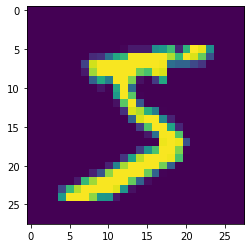

In [8]:
plt.imshow(image)

### Channel 관련

[ Batch Size, Height, Width, Channel ]

GrayScale 이면 1, RGB이면 3으로 만들어 주어야 함

- Data Shape = (60000, 28, 28)

In [9]:
train_x.shape

(60000, 28, 28)

#### numpy의 expand_dims를 활용하여 차원 수 늘리기 

- -1일 경우 맨 뒤에

In [12]:
expanded_data = np.expand_dims(train_x, -1)
expanded_data.shape

(60000, 28, 28, 1)

- 0일 경우 맨 앞에

In [15]:
expanded_data = np.expand_dims(train_x, 0)
expanded_data.shape

(1, 60000, 28, 28)

- 2번 연속 사용하면 앞뒤로

In [16]:
expanded_data = np.expand_dims(np.expand_dims(train_x, -1), 0)
expanded_data.shape

(1, 60000, 28, 28, 1)

#### TensorFlow의 expand_dims를 활용하는 방법

In [17]:
new_train_x = tf.expand_dims(train_x, -1)
new_train_x.shape

TensorShape([60000, 28, 28, 1])

### TensorFlow의 tf.newaxis를 활용하는 방법

In [18]:
train_x.shape

(60000, 28, 28)

In [19]:
train_x[..., tf.newaxis].shape

(60000, 28, 28, 1)

### reshape을 활용하는 방법

In [20]:
reshaped = train_x.reshape( [60000, 28, 28, 1] )
reshaped.shape

(60000, 28, 28, 1)

#### matplotlib 으로 시각화 할 경우 gray scale의 이미지는 3번째 dimension(차원)이 없으므로 2개의 dimension으로 gray scale로 차원 조절해서 넣어줘야함

In [21]:
new_train_x = train_x[..., tf.newaxis]
new_train_x.shape

(60000, 28, 28, 1)

#### dimension이 맞지 않아서 아래와 같이 오류가 나는 것을 볼 수 있음 

TypeError: ignored

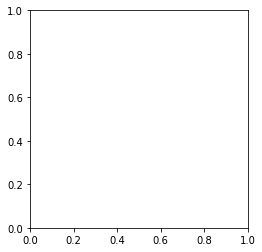

In [22]:
disp = new_train_x[0]

plt.imshow(disp, 'gray')
plt.show()

#### 시각화를 할 때는 (28, 28, 1) 에서 1이 없어야 함

In [23]:
disp.shape

(28, 28, 1)

#### new_train_x[0] -> new_train_x[1, :, :, 0]
#### new_train_x[0] -> np.squeeze(new_train_x[0])
#### 위와 같은 방법으로 (28, 28, 1) 이 었던 dimension을 (28, 28)로 바꾸어줌

In [24]:
disp_new = np.squeeze(new_train_x[0])
disp.shape, disp_new.shape

((28, 28, 1), (28, 28))

In [27]:
disp_new = new_train_x[0, :, :, 0]
disp.shape, disp_new.shape

((28, 28, 1), (28, 28))

#### 다시 시각화해보기

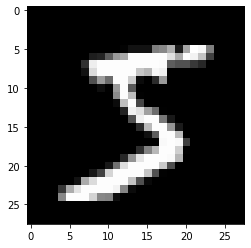

In [28]:
plt.imshow(disp_new, 'gray')
plt.show()

### Label Dataset 들여다보기

In [29]:
train_y.shape

(60000,)

- Label 시각화 해보기

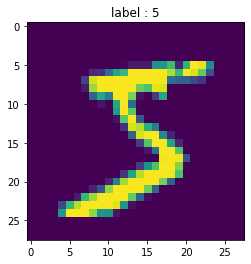

In [30]:
plt.imshow(train_x[0])
plt.title("label : {}".format(train_y[0]))
plt.show()

### One-Hot Encoding

- 0 -> [1, 0, 0, 0]    1-> [0, 1, 0, 0]
- 2 -> [0, 0, 1, 0]    3-> [0, 0, 0, 1]

#### tensorflow.keras.utils.to_categorical 사용

In [31]:
from tensorflow.keras.utils import to_categorical

- to_categorical(label, 전체 클래스 개수)

In [34]:
to_categorical(1, 4)

array([0., 1., 0., 0.], dtype=float32)

In [35]:
to_categorical(0, 4)

array([1., 0., 0., 0.], dtype=float32)

- label을 to_categorical을 활용해 One Hot Encoding

In [36]:
label = train_y[0]
label_onehot = to_categorical(label, num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

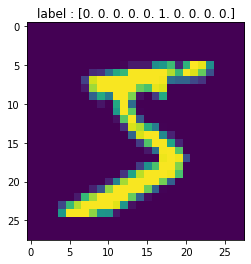

In [37]:
plt.imshow(train_x[0])
plt.title("label : {}".format(label_onehot))
plt.show()